In [3]:
import pandas as pd

df = pd.read_csv('who_aap_2021_v9_11august2022.csv') #read CSV file

df.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,Unnamed: 15,Unnamed: 16
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN,NaN,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN


In [4]:
df["WHO Region"].value_counts() #to check data available

European Region                 20292
Western Pacific Region           4798
Region of the Americas           3957
South East Asia Region           2514
Eastern Mediterranean Region      438
African Region                    191
Name: WHO Region, dtype: int64

The above numbers indicate an imbalanced dataset with lower values for Africa and the Eastern Mediterranean Region

### Data Visualization

In [29]:
import matplotlib.pyplot as plt

#remove data before 2010
# get names of indexes for which column year has value less than 2010
index_names = df[ df['Measurement Year'] <= 2010 ].index
  
# drop these row indexes from dataFrame
df.drop(index_names, inplace = True)

df.head()

,WHO Region,ISO3,WHO Country Name,City or Locality,Measurement Year,PM2.5 (μg/m3),PM10 (μg/m3),NO2 (μg/m3),PM25 temporal coverage (%),PM10 temporal coverage (%),NO2 temporal coverage (%),Reference,Number and type of monitoring stations,Version of the database,Status,Unnamed: 15,Unnamed: 16
0,Eastern Mediterranean Region,AFG,Afghanistan,Kabul,2019,119.77,NaN,NaN,18.0,NaN,NaN,"U.S. Department of State, United States Enviro...",NaN,2022,NaN,NaN,NaN
1,European Region,ALB,Albania,Durres,2015,NaN,17.65,26.63,NaN,NaN,83.961187,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
2,European Region,ALB,Albania,Durres,2016,14.32,24.56,24.78,NaN,NaN,87.932605,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
3,European Region,ALB,Albania,Elbasan,2015,NaN,NaN,23.96,NaN,NaN,97.853881,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN
4,European Region,ALB,Albania,Elbasan,2016,NaN,NaN,26.26,NaN,NaN,96.049636,European Environment Agency (downloaded in 2021),NaN,2022,NaN,NaN,NaN


In [30]:
df_pivot = df.pivot_table(index='Measurement Year', columns='WHO Region', values='PM2.5 (μg/m3)', aggfunc='sum')
df_pivot.head() 

WHO Region,African Region,Eastern Mediterranean Region,European Region,Region of the Americas,South East Asia Region,Western Pacific Region
Measurement Year,,,,,,
2011,118.97,403.92,246.33,1584.11,422.90,535.16
2012,439.02,478.48,605.72,1460.25,403.90,799.61
2013,279.65,305.45,10506.17,2904.93,659.09,1024.07
2014,155.82,448.25,11051.99,2394.90,634.29,11776.79
2015,195.90,324.63,13571.81,3542.28,684.91,28259.45


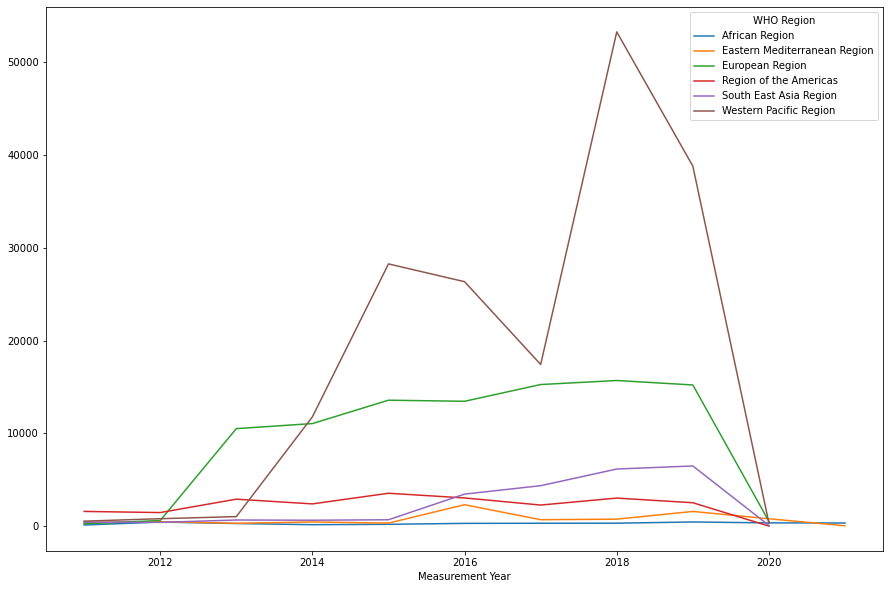

In [31]:
df_pivot.plot(figsize=(15, 10)) #to see annual trends for PM 2.5

plt.show()

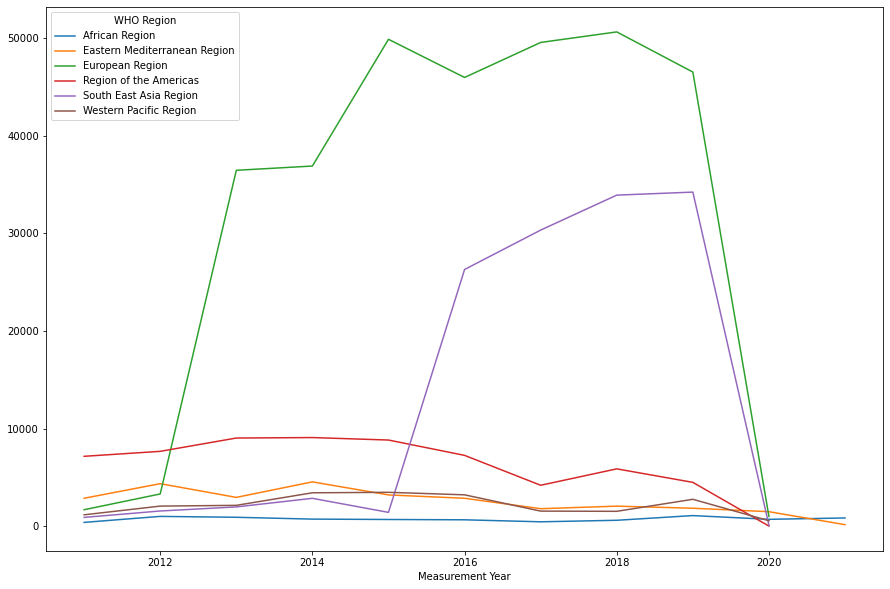

In [34]:
#Annual trends for pm 10
df_pivot2 = df.pivot_table(index='Measurement Year', columns='WHO Region', values='PM10 (μg/m3)', aggfunc='sum')

df_pivot2.plot(figsize=(15, 10)) #to see annual trends for PM10

plt.show()

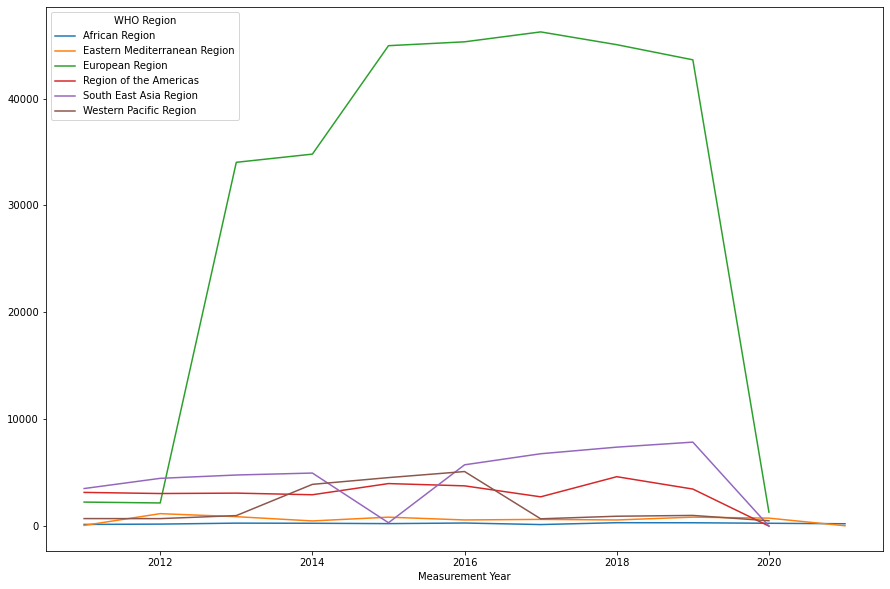

In [35]:
#Annual trends for no2
df_pivot3 = df.pivot_table(index='Measurement Year', columns='WHO Region', values='NO2 (μg/m3)', aggfunc='sum')

df_pivot3.plot(figsize=(15, 10)) #to see annual trends for NO2

plt.show()

### Aggregating statistics

In [36]:
#overall summary of the entire dataset
pm2_5 = df['PM2.5 (μg/m3)'].describe()
pm10 = df['PM10 (μg/m3)'].describe()
no2 = df['NO2 (μg/m3)'].describe()

print("PM 2.5 summary")
print(pm2_5, "\n")

print("PM 10 summary")
print(pm10, "\n")

print("NO2 Summary")
print(no2)

PM 2.5 summary
count    14318.000000
mean        23.193039
std         18.157348
min          0.010000
25%         10.300000
50%         16.000000
75%         31.957500
max        191.900000
Name: PM2.5 (μg/m3), dtype: float64 

PM 10 summary
count    18935.000000
mean        30.459645
std         29.510067
min          1.040000
25%         16.670000
50%         21.550000
75%         31.150000
max        526.500000
Name: PM10 (μg/m3), dtype: float64 

NO2 Summary
count    19886.000000
mean        20.352201
std         12.143125
min          0.000000
25%         11.710000
50%         18.480000
75%         26.830000
max        210.680000
Name: NO2 (μg/m3), dtype: float64


In [37]:
#Compare by region

pm2_5_region = df[['WHO Region', 'PM2.5 (μg/m3)']].groupby('WHO Region').mean()

pm10_region = df[['WHO Region', 'PM10 (μg/m3)']].groupby('WHO Region').mean()

print(pm2_5_region, "\n", pm10_region)

                              PM2.5 (μg/m3)
WHO Region                                 
African Region                    27.007667
Eastern Mediterranean Region      37.275138
European Region                   13.733923
Region of the Americas            11.256540
South East Asia Region            42.478306
Western Pacific Region            40.458246 
                               PM10 (μg/m3)
WHO Region                                
African Region                   52.575526
Eastern Mediterranean Region    114.870984
European Region                  22.399906
Region of the Americas           30.528102
South East Asia Region           94.437426
Western Pacific Region           32.319318
